In [1]:
import numpy as np
import matplotlib.pyplot as plt

def DILILA(t,t_len, dinit,gapinit,gapcrit,gapfin,dcrit,dfin,tinflect):
    numstep1 = gapinit* dcrit* t + gapcrit* dinit*(tinflect -t)
    denomsteps1 = gapinit* t + gapcrit * (tinflect - t)
    numstep2 = gapfin* dcrit*(t_len - t ) + gapcrit* dfin*(t-tinflect)
    denomsteps2 = gapfin*(t_len -t) +gapcrit*(t-tinflect)
    if t>t_len:
        out = dfin
    elif t>tinflect:
        out = numstep2/denomsteps2
    else:
        out = numstep1/denomsteps1
    return out
def UniLILA(t,t_len, dinit,gapinit,gapcrit,dcrit):
    numstep1 = gapinit* dcrit* t + gapcrit* dinit*(t_len -t)
    denomsteps1 = gapinit* t + gapcrit * (t_len - t)
    if t>t_len:
        out = dcrit
    else:
        out = numstep1/denomsteps1
    return out

In [2]:
Rabi_ramp_time = 1
T_UniLILA = 4.5
T_UniLILA_stop = 3
gapinit= 5.26
gapcrit = 0.355
t_wait = 2
dinit = -5.0
dcrit = 1.53
Omega = 2
auto_tinflect = 0
T_total = 13
t = np.arange(0,T_total,0.0001)
print(T_total)

13


0.6762
1.3523
2.7047000000000003
3.6062000000000003


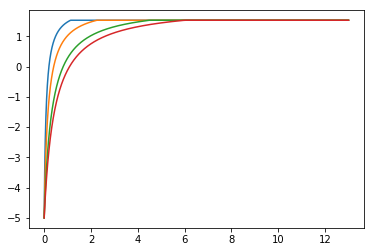

In [19]:
det1 = []
det2 = []
det3 = []
det4 = []
for t_i in t:
    det1.append(UniLILA(t_i,T_UniLILA/4,dinit,gapinit,gapcrit,dcrit))
    det2.append(UniLILA(t_i,T_UniLILA/2,dinit,gapinit,gapcrit,dcrit))
    det3.append(UniLILA(t_i,T_UniLILA,dinit,gapinit,gapcrit,dcrit))
    det4.append(UniLILA(t_i,6,dinit,gapinit,gapcrit,dcrit))

plt.plot(t,det1)    
plt.plot(t,det2)    
plt.plot(t,det3)
plt.plot(t,det4)

detuningcutoff = 1.25
id1 = np.argmin(abs(np.array(det1)-detuningcutoff))
id2 = np.argmin(abs(np.array(det2)-detuningcutoff))
id3 = np.argmin(abs(np.array(det3)-detuningcutoff))
id4 = np.argmin(abs(np.array(det4)-detuningcutoff))

print(t[id1])
print(t[id2])
print(t[id3])
print(t[id4])

In [7]:
4.5/4

1.125

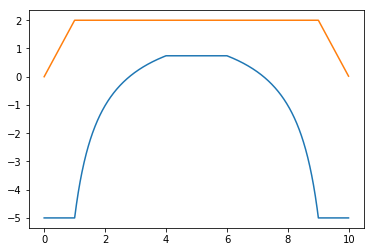

In [81]:
detuning = []
rabi = []
for t_i in t:
    detuning.append(Deltafunc(t_i))
    rabi.append(Omegafunc(t_i))
plt.plot(t,detuning)
plt.plot(t,rabi)

In [69]:
def Deltafunc(time):
    if 0<=time<Rabi_ramp_time:
        return dinit
    if Rabi_ramp_time<= time <Rabi_ramp_time+T_UniLILA_stop:
        return UniLILA(time-Rabi_ramp_time,T_UniLILA,dinit,gapinit, gapcrit,dcrit)
    if Rabi_ramp_time+T_UniLILA_stop <= time < T_UniLILA_stop + Rabi_ramp_time+ t_wait:
        return UniLILA(T_UniLILA_stop,T_UniLILA,dinit,gapinit, gapcrit,dcrit)
    if  T_UniLILA_stop + Rabi_ramp_time+ t_wait <= time <  2*T_UniLILA_stop + Rabi_ramp_time+ t_wait:
        temp_t = T_total-time
        return UniLILA(temp_t-Rabi_ramp_time,T_UniLILA,dinit,gapinit, gapcrit,dcrit)
    if 2*T_UniLILA_stop + Rabi_ramp_time+ t_wait<= time <= T_total:
        return dinit
    else: 
        print('detuning t out of range ', str(t))
        return 

In [80]:
def Omegafunc(time):
    if 0 <= time < Rabi_ramp_time:
        return Omega*time/Rabi_ramp_time
    if Rabi_ramp_time<= time < T_total -Rabi_ramp_time:
        return Omega
    if T_total -Rabi_ramp_time <= time<= T_total:
        return Omega*(T_total-time)/Rabi_ramp_time
    else:
        print('Omega t out of range',str(t))
        return

In [84]:
import random as random
N=20

In [86]:
site_dep_rabi = 0.2*(np.random.random(N)-0.5)
site_dep_interaction = (np.random.random(N)-0.5)

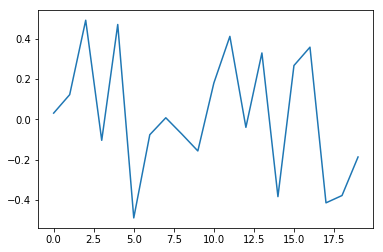

In [88]:
plt.plot(site_dep_interaction)